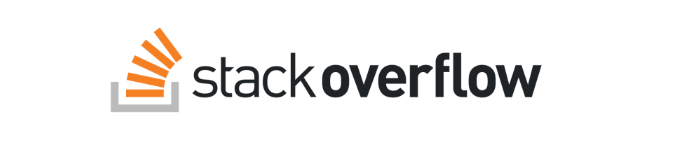

# Préparation initiale dataset

## Récupération du dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict, Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud, STOPWORDS
import gc

# Download the required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv("QueryResults.csv")
print(df.shape)

(50000, 8)


In [3]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>,18986098,17,6492,0.0,1
1,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...,971249,82,79057,0.0,13
2,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>,3683450,157,231366,0.0,14
3,SessionTimeout: web.xml vs session.maxInactive...,<p>I'm trying to timeout an <em>HttpSession</e...,<java><session><servlets><weblogic><session-ti...,3118968,65,113655,0.0,2
4,Getting GDB to save a list of breakpoints,"<p>OK, <em><a href=""https://sourceware.org/gdb...",<c++><c><debugging><gdb><breakpoints>,501486,146,51459,0.0,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   ViewCount      50000 non-null  int64  
 6   FavoriteCount  43480 non-null  float64
 7   AnswerCount    50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [5]:
df.nunique()

Title            50000
Body             50000
Tags             49090
Id               50000
Score              737
ViewCount        27428
FavoriteCount        3
AnswerCount         65
dtype: int64

In [6]:
# copy
data = df.copy()

## Prétraitement du texte

In [7]:
data = data[['Title', 'Body', 'Tags']]
data.head()

,Title,Body,Tags
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>
1,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...
2,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>
3,SessionTimeout: web.xml vs session.maxInactive...,<p>I'm trying to timeout an <em>HttpSession</e...,<java><session><servlets><weblogic><session-ti...
4,Getting GDB to save a list of breakpoints,"<p>OK, <em><a href=""https://sourceware.org/gdb...",<c++><c><debugging><gdb><breakpoints>


In [8]:
data.isna().sum()

Title    0
Body     0
Tags     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [10]:
# Remove HTML tags from Body column
data['Body_clean'] = data['Body'].apply(lambda x: re.sub('<.*?>', '', x))

In [11]:
data

,Title,Body,Tags,Body_clean
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>,I have created a particle and when I test it m...
1,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...,I'm programming an application in Objective-C ...
2,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>,I'd like to handle the Closing event (when a u...
3,SessionTimeout: web.xml vs session.maxInactive...,<p>I'm trying to timeout an <em>HttpSession</e...,<java><session><servlets><weblogic><session-ti...,I'm trying to timeout an HttpSession in Java. ...
4,Getting GDB to save a list of breakpoints,"<p>OK, <em><a href=""https://sourceware.org/gdb...",<c++><c><debugging><gdb><breakpoints>,"OK, info break lists the breakpoints, but not ..."
...,...,...,...,...
49995,How can I String.Format a TimeSpan object with...,<p>What is the recommended way of formatting <...,<c#><.net><string><time><formatting>,What is the recommended way of formatting Time...
49996,How can Polymorphism replace an if-else statem...,<p>How can polymorphism replace an if-else sta...,<language-agnostic><oop><loops><polymorphism><...,How can polymorphism replace an if-else statem...
49997,What thread does JavaScript code called from F...,"<p>As far as I understand, all JavaScript code...",<javascript><flash><actionscript-3><multithrea...,"As far as I understand, all JavaScript code is..."
49998,Android Gradle's dependency cache may be corru...,"<p>I am trying to import this project, even I ...",<java><android><android-studio><gradle><build....,"I am trying to import this project, even I tri..."


In [12]:
# Define a function to remove punctuations and digits
def remove_punc_digits(text):
    # Remove digits
    text = re.sub('\d+', '', text)
    # Remove punctuations and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [13]:
# Apply the function to Title and Body columns
data['Title_clean'] = data['Title'].apply(remove_punc_digits)
data['Body_clean'] = data['Body_clean'].apply(remove_punc_digits)

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# List of texts to analyze
texts = data['Body_clean']

# Tokenize the texts and convert to lowercase
words = [word.lower() for text in texts for word in nltk.word_tokenize(text)]

# Count the frequency of each word
freq = Counter(words)

# Get the most common 100 words and combine with default NLTK stopwords
most_freq = [word for word, count in freq.most_common(100)]
sw = set(stopwords.words('english')).union(set(most_freq))

# Remove stopwords from the list of words
words_without_sw = [word for word in words if word not in sw]

In [16]:
def clean_text(text):
    # Tokenize le texte
    tokens = nltk.word_tokenize(text)
    # Enlève les stopwords
    stopwords_en = set(stopwords.words('english'))
    tokens_without_sw = [token for token in tokens if token not in stopwords_en]
    # Retourne la liste de mots sans stopwords
    return tokens_without_sw

In [17]:
# Applique la fonction de nettoyage à la colonne "Body"
data['Body_clean'] = data['Body_clean'].apply(clean_text)

In [18]:
# List of texts to analyze
texts = data['Title_clean']

# Tokenize the texts and convert to lowercase
words = [word.lower() for text in texts for word in nltk.word_tokenize(text)]

# Count the frequency of each word
freq = Counter(words)

# Get the most common 100 words and combine with default NLTK stopwords
most_freq = [word for word, count in freq.most_common(100)]
sw = set(stopwords.words('english')).union(set(most_freq))

# Remove stopwords from the list of words
words_without_sw = [word for word in words if word not in sw]

In [19]:
# Applique la fonction de nettoyage à la colonne "Body"
data['Title_clean'] = data['Title_clean'].apply(clean_text)

## Fusion des Titles & Body

In [20]:
data['Texte_clean'] = data['Title_clean'] + data['Body_clean']

In [21]:
data

,Title,Body,Tags,Body_clean,Title_clean,Texte_clean
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>,"[I, created, particle, I, test, moving, Xcodes...","[Making, particle, follow, path, spriteKit]","[Making, particle, follow, path, spriteKit, I,..."
1,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...,"[Im, programming, application, ObjectiveC, Im,...","[How, find, cause, malloc, double, free, error]","[How, find, cause, malloc, double, free, error..."
2,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>,"[Id, like, handle, Closing, event, user, click...","[Handling, window, closing, event, WPF, MVVM, ...","[Handling, window, closing, event, WPF, MVVM, ..."
3,SessionTimeout: web.xml vs session.maxInactive...,<p>I'm trying to timeout an <em>HttpSession</e...,<java><session><servlets><weblogic><session-ti...,"[Im, trying, timeout, HttpSession, Java, My, c...","[SessionTimeout, webxml, vs, sessionmaxInactiv...","[SessionTimeout, webxml, vs, sessionmaxInactiv..."
4,Getting GDB to save a list of breakpoints,"<p>OK, <em><a href=""https://sourceware.org/gdb...",<c++><c><debugging><gdb><breakpoints>,"[OK, info, break, lists, breakpoints, format, ...","[Getting, GDB, save, list, breakpoints]","[Getting, GDB, save, list, breakpoints, OK, in..."
...,...,...,...,...,...,...
49995,How can I String.Format a TimeSpan object with...,<p>What is the recommended way of formatting <...,<c#><.net><string><time><formatting>,"[What, recommended, way, formatting, TimeSpan,...","[How, I, StringFormat, TimeSpan, object, custo...","[How, I, StringFormat, TimeSpan, object, custo..."
49996,How can Polymorphism replace an if-else statem...,<p>How can polymorphism replace an if-else sta...,<language-agnostic><oop><loops><polymorphism><...,"[How, polymorphism, replace, ifelse, statement...","[How, Polymorphism, replace, ifelse, statement...","[How, Polymorphism, replace, ifelse, statement..."
49997,What thread does JavaScript code called from F...,"<p>As far as I understand, all JavaScript code...",<javascript><flash><actionscript-3><multithrea...,"[As, far, I, understand, JavaScript, code, eve...","[What, thread, JavaScript, code, called, Flash...","[What, thread, JavaScript, code, called, Flash..."
49998,Android Gradle's dependency cache may be corru...,"<p>I am trying to import this project, even I ...",<java><android><android-studio><gradle><build....,"[I, trying, import, project, even, I, tried, i...","[Android, Gradles, dependency, cache, may, cor...","[Android, Gradles, dependency, cache, may, cor..."


In [22]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
def lemmatize_text(text):
    if isinstance(text, str):
        lemmatizer = WordNetLemmatizer()
        tokens = nltk.word_tokenize(text)
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return " ".join(lemmatized_tokens)
    else:
        return text

In [24]:
data['Texte_clean'] = data['Texte_clean'].astype(str)

In [25]:
# Applique la fonction de nettoyage à la colonne "Body"
data['Texte_lem'] = data['Texte_clean'].apply(lemmatize_text)

In [26]:
# remplacer tous les caractères dans la colonne "Text_lem"
data['Texte_lem'] = data['Texte_lem'].str.replace("[", "")
data['Texte_lem'] = data['Texte_lem'].str.replace("]", "")
data['Texte_lem'] = data['Texte_lem'].str.replace("'", "")
data['Texte_lem'] = data['Texte_lem'].str.replace(",", "")

In [27]:
data

,Title,Body,Tags,Body_clean,Title_clean,Texte_clean,Texte_lem
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>,"[I, created, particle, I, test, moving, Xcodes...","[Making, particle, follow, path, spriteKit]","['Making', 'particle', 'follow', 'path', 'spri...",Making particle follow path spriteKit...
1,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...,"[Im, programming, application, ObjectiveC, Im,...","[How, find, cause, malloc, double, free, error]","['How', 'find', 'cause', 'malloc', 'double', '...",How find cause malloc double free ...
2,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>,"[Id, like, handle, Closing, event, user, click...","[Handling, window, closing, event, WPF, MVVM, ...","['Handling', 'window', 'closing', 'event', 'WP...",Handling window closing event WPF M...
3,SessionTimeout: web.xml vs session.maxInactive...,<p>I'm trying to timeout an <em>HttpSession</e...,<java><session><servlets><weblogic><session-ti...,"[Im, trying, timeout, HttpSession, Java, My, c...","[SessionTimeout, webxml, vs, sessionmaxInactiv...","['SessionTimeout', 'webxml', 'vs', 'sessionmax...",SessionTimeout webxml vs sessionmaxInac...
4,Getting GDB to save a list of breakpoints,"<p>OK, <em><a href=""https://sourceware.org/gdb...",<c++><c><debugging><gdb><breakpoints>,"[OK, info, break, lists, breakpoints, format, ...","[Getting, GDB, save, list, breakpoints]","['Getting', 'GDB', 'save', 'list', 'breakpoint...",Getting GDB save list breakpoints O...
...,...,...,...,...,...,...,...
49995,How can I String.Format a TimeSpan object with...,<p>What is the recommended way of formatting <...,<c#><.net><string><time><formatting>,"[What, recommended, way, formatting, TimeSpan,...","[How, I, StringFormat, TimeSpan, object, custo...","['How', 'I', 'StringFormat', 'TimeSpan', 'obje...",How I StringFormat TimeSpan object ...
49996,How can Polymorphism replace an if-else statem...,<p>How can polymorphism replace an if-else sta...,<language-agnostic><oop><loops><polymorphism><...,"[How, polymorphism, replace, ifelse, statement...","[How, Polymorphism, replace, ifelse, statement...","['How', 'Polymorphism', 'replace', 'ifelse', '...",How Polymorphism replace ifelse state...
49997,What thread does JavaScript code called from F...,"<p>As far as I understand, all JavaScript code...",<javascript><flash><actionscript-3><multithrea...,"[As, far, I, understand, JavaScript, code, eve...","[What, thread, JavaScript, code, called, Flash...","['What', 'thread', 'JavaScript', 'code', 'call...",What thread JavaScript code called ...
49998,Android Gradle's dependency cache may be corru...,"<p>I am trying to import this project, even I ...",<java><android><android-studio><gradle><build....,"[I, trying, import, project, even, I, tried, i...","[Android, Gradles, dependency, cache, may, cor...","['Android', 'Gradles', 'dependency', 'cache', ...",Android Gradles dependency cache may ...


## Tags (Target)

In [28]:
# remplacer tous les caractères dans la colonne "Tags"
data['Tags_clean'] = data['Tags'].str.replace("<|>"," ")
data['Tags_clean'] = data['Tags_clean'].str.replace(",+"," ")

## Drop Feature prétraitement

In [29]:
data.drop(['Title', 'Body', 'Tags', 'Body_clean',
          'Title_clean', 'Texte_clean'], axis=1, inplace=True)

## Doublons

In [30]:
data.duplicated().sum()

0

In [31]:
data.duplicated(subset='Texte_lem').sum()

0

In [32]:
for col in data.columns:
    n = data.duplicated(subset=col).sum()
    print(f"col: {col} -> duplicated : {n}")

col: Texte_lem -> duplicated : 0
col: Tags_clean -> duplicated : 910


# Features engineering

In [33]:
def len_fct(sentence) :
    return len(sentence)

In [34]:
data["Texte_len"] = data['Texte_lem'].apply(len_fct)
data["Texte_len"].head()

0    914
1    401
2    765
3    649
4    597
Name: Texte_len, dtype: int64

<AxesSubplot:xlabel='Texte_len'>

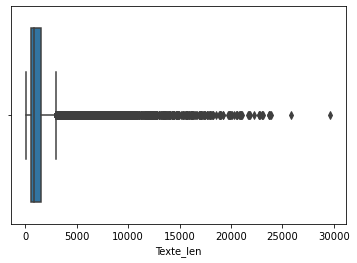

In [35]:
sns.boxplot(data["Texte_len"])

<AxesSubplot:xlabel='Texte_len', ylabel='Density'>

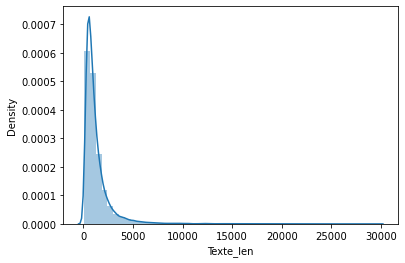

In [36]:
sns.distplot(data["Texte_len"])

In [37]:
data["Tags_len"] = data["Tags_clean"].apply(len_fct)
data["Tags_len"].head()

0    46
1    61
2    33
3    52
4    37
Name: Tags_len, dtype: int64

<AxesSubplot:xlabel='Tags_len'>

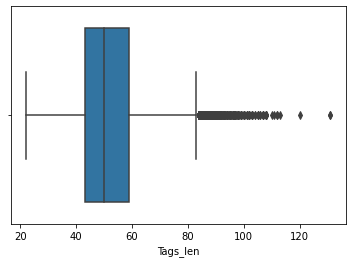

In [38]:
sns.boxplot(data["Tags_len"])

<AxesSubplot:xlabel='Tags_len', ylabel='Density'>

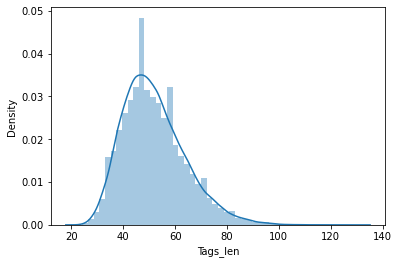

In [39]:
sns.distplot(data["Tags_len"])

In [40]:
data["Tags_len_ratio"] = round(data.apply(
    lambda r: (r["Texte_len"] / r["Tags_len"]), axis=1))
data["Tags_len_ratio"].head()

0    20.0
1     7.0
2    23.0
3    12.0
4    16.0
Name: Tags_len_ratio, dtype: float64

<AxesSubplot:xlabel='Tags_len_ratio'>

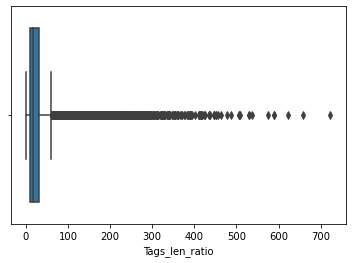

In [41]:
sns.boxplot(data["Tags_len_ratio"])

<AxesSubplot:xlabel='Tags_len_ratio', ylabel='Density'>

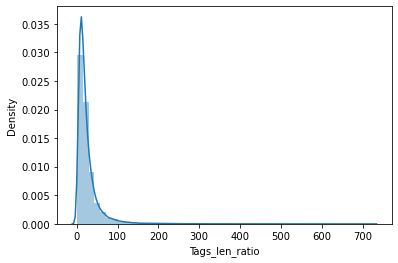

In [42]:
sns.distplot(data["Tags_len_ratio"])

# Exploration

In [43]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

## Texte

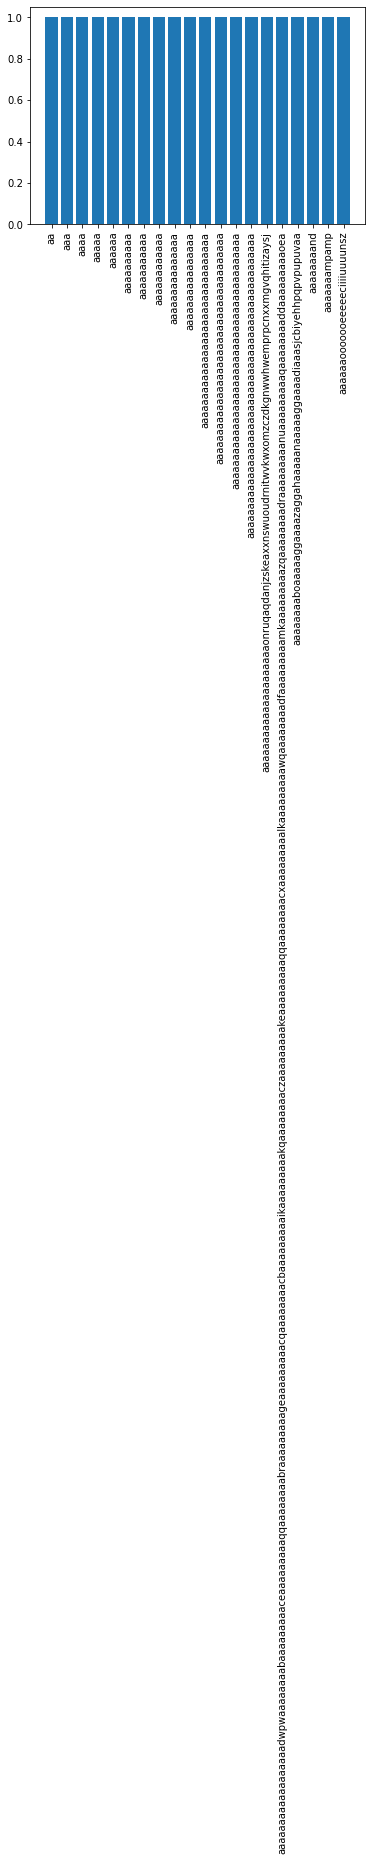

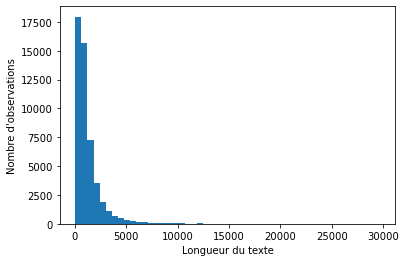

In [44]:
# Créer un vecteur de comptage de mots
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(data['Texte_lem'])

# Visualiser les mots les plus fréquents
word_freq = Counter(vectorizer.get_feature_names())
top_words = word_freq.most_common(20)
x, y = zip(*top_words)
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

# Visualiser la distribution des longueurs de texte
text_lengths = data['Texte_lem'].str.len()
plt.hist(text_lengths, bins=50)
plt.xlabel('Longueur du texte')
plt.ylabel('Nombre d\'observations')
plt.show()

Nous utilisons le vecteur pour visualiser les mots les plus fréquents, la distribution des longueurs de Titre. Ces visualisations peuvent être utiles pour comprendre les caractéristiques et guider le processus de modélisation ultérieur.

In [45]:
# Convertir les titres en une liste de mots
words = data['Texte_lem'].apply(lambda x: x.split())

# Compter les occurrences de chaque mot
word_counts = Counter([word for sublist in words for word in sublist])

# Afficher les mots les plus présents
top_words = word_counts.most_common(10)
for word, count in top_words:
    print(f'{word}: {count} occurrences')

I: 210732 occurrences
using: 36540 occurrences
gt: 33406 occurrences
The: 29302 occurrences
Im: 27462 occurrences
code: 27269 occurrences
like: 26835 occurrences
new: 26794 occurrences
public: 26237 occurrences
use: 25570 occurrences


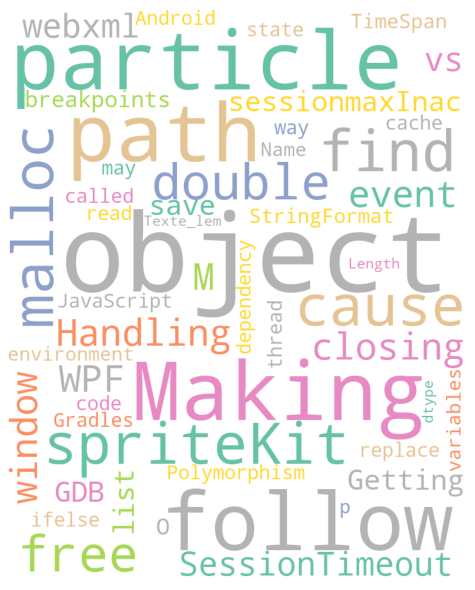

In [46]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 1000,
                max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2").generate(str(data["Texte_lem"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Outliers

In [ ]:
data['Text_split'] = data.apply(lambda r :r['Texte_lem'].split(), axis=1)

In [ ]:
def liste_word(document) :
    dico_words = {}
    for sentence in document :
        for word in sentence :
            if word in dico_words :
                dico_words[word] += 1
            else :
                dico_words[word] = 1
    return dico_words

In [ ]:
dico_words = liste_word(data['Tags_split'])

In [ ]:
words_df = pd.DataFrame(list(dico_words .items()), columns = ['Words', 'Quantity'])

In [ ]:
# Trier la feature par ordre décroissant
words_df.sort_values(by='Quantity', ascending=False)

In [ ]:
words_df.describe()

In [ ]:
words_df['percent'] = words_df.apply(
    lambda r: r['Quantity']*100/words_df['Quantity'].sum(), axis=1)

In [ ]:
words_df['percent'].sum()

In [ ]:
var = 'Quantity'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(words_df, x=var, bins=30, ax=ax1)
sns.boxplot(words_df[var], ax=ax2)

In [ ]:
# Filtre des tags avec le plus de quantité
words_df = words_df[words_df['Quantity'] >500]

In [ ]:
words_importante = words_df['Words'].tolist()

In [ ]:
def filter_words(tags):
    words_list = words.split()
    # filtre les tags en gardant uniquement ceux qui sont importants
    filtered_words = [words for words in words_list if words in words_importante]
    if len(filtered_words) == 0:
        return np.nan
    else:
        # retourne les words filtrés et leur longueur
        return ' '.join(filtered_words), len(filtered_words)

In [ ]:
# Application de la fonction
data[['Words_filtered', 'Words_filtered_len']] = data['Words_clean'].apply(
    lambda x: filter_words(x)).apply(pd.Series)

In [ ]:
data = data.dropna(subset=['Words_filtered'])

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, 
                height = 1000,
                background_color ='white',
                max_words = 1000, 
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2"
                ).generate(str(data["Tags_filtered"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Drop features words

In [ ]:
data.drop(['Words_clean', 'Words_split'], axis=1, inplace=True)

In [ ]:
data

## Tags

In [92]:
# Visualiser la distribution des longueurs de texte
text_lengths = data['Tags_clean'].str.len()
plt.hist(text_lengths, bins=50)
plt.xlabel('Longueur du texte')
plt.ylabel('Nombre d\'observations')
plt.show()

KeyError: 'Tags_clean'

In [48]:
# Convertir les titres en une liste de mots
words = data['Tags_clean'].apply(lambda x: x.split())

# Compter les occurrences de chaque mot
word_counts = Counter([word for sublist in words for word in sublist])

# Afficher les mots les plus présents
top_words = word_counts.most_common(10)
for word, count in top_words:
    print(f'{word}: {count} occurrences')

c#: 6141 occurrences
java: 6004 occurrences
javascript: 5116 occurrences
python: 4873 occurrences
c++: 3862 occurrences
ios: 3450 occurrences
android: 3294 occurrences
.net: 3053 occurrences
html: 2210 occurrences
php: 2159 occurrences


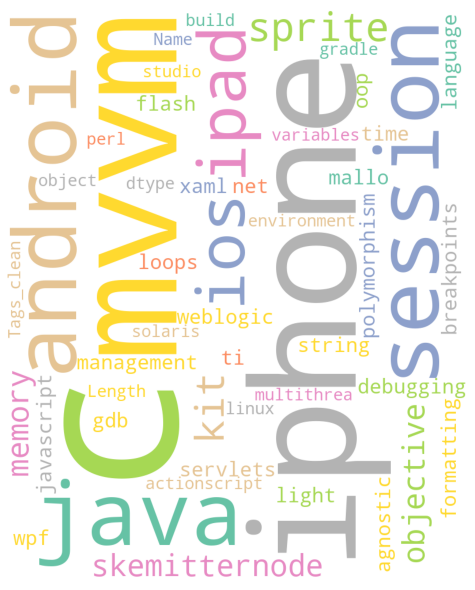

In [49]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, 
                height = 1000,
                background_color ='white',
                max_words = 1000, 
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2"
                ).generate(str(data["Tags_clean"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Outliers

In [50]:
data['Tags_split'] = data.apply(lambda r :r['Tags_clean'].split(), axis=1)

In [51]:
def liste_tags(document) :
    dico_tags = {}
    for sentence in document :
        for tag in sentence :
            if tag in dico_tags :
                dico_tags[tag] += 1
            else :
                dico_tags[tag] = 1
    return dico_tags

In [52]:
dico_tags = liste_tags(data['Tags_split'])

In [53]:
tags_df = pd.DataFrame(list(dico_tags.items()), columns = ['Tags', 'Quantity'])

In [54]:
# Trier la feature par ordre décroissant
tags_df.sort_values(by='Quantity', ascending=False)

,Tags,Quantity
9,c#,6141
14,java,6004
60,javascript,5116
28,python,4873
19,c++,3862
...,...,...
12170,filechannel,1
12169,serviceknowntype,1
2921,pagerank,1
12167,raise,1


In [55]:
tags_df.describe()

,Quantity
count,18384.000000
mean,13.598890
std,112.765402
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,6141.000000


In [56]:
tags_df['percent'] = tags_df.apply(
    lambda r: r['Quantity']*100/tags_df['Quantity'].sum(), axis=1)

In [57]:
tags_df['percent'].sum()

100.00000000000001

<AxesSubplot:xlabel='Quantity'>

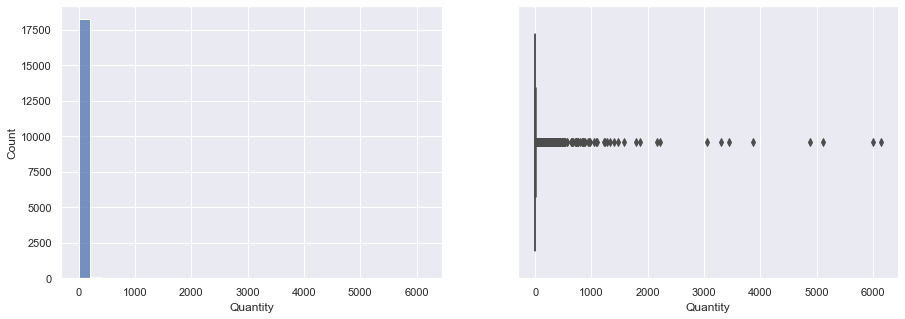

In [58]:
var = 'Quantity'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(tags_df, x=var, bins=30, ax=ax1)
sns.boxplot(tags_df[var], ax=ax2)

In [59]:
# Filtre des tags avec le plus de quantité
tags_df = tags_df[tags_df['Quantity'] >500]

In [60]:
tags_importante = tags_df['Tags'].tolist()

In [61]:
def filter_tags(tags):
    tags_list = tags.split()
    # filtre les tags en gardant uniquement ceux qui sont importants
    filtered_tags = [tag for tag in tags_list if tag in tags_importante]
    if len(filtered_tags) == 0:
        return np.nan
    else:
        # retourne une tuple contenant les tags filtrés et leur longueur
        return ' '.join(filtered_tags), len(filtered_tags)

In [62]:
# Application de la fonction
data[['Tags_filtered', 'Tags_filtered_len']] = data['Tags_clean'].apply(
    lambda x: filter_tags(x)).apply(pd.Series)

In [63]:
data = data.dropna(subset=['Tags_filtered'])

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, 
                height = 1000,
                background_color ='white',
                max_words = 1000, 
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2"
                ).generate(str(data["Tags_filtered"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Drop features Tags

In [64]:
data.drop(['Tags_clean', 'Tags_split'], axis=1, inplace=True)

In [65]:
data

,Texte_lem,Texte_len,Tags_len,Tags_len_ratio,Tags_filtered,Tags_filtered_len
0,Making particle follow path spriteKit...,914,46,20.0,ios iphone,2.0
1,How find cause malloc double free ...,401,61,7.0,iphone objective-c,2.0
2,Handling window closing event WPF M...,765,33,23.0,c# wpf,2.0
3,SessionTimeout webxml vs sessionmaxInac...,649,52,12.0,java,1.0
4,Getting GDB save list breakpoints O...,597,37,16.0,c++ c,2.0
...,...,...,...,...,...,...
49994,Is advantage use Synchronized Method ...,168,58,3.0,java multithreading,2.0
49995,How I StringFormat TimeSpan object ...,158,36,4.0,c# .net string,3.0
49997,What thread JavaScript code called ...,522,65,8.0,javascript multithreading,2.0
49998,Android Gradles dependency cache may ...,663,53,13.0,java android,2.0


# Analyses

In [66]:
df_feature = df[['Score', 'ViewCount',
                'AnswerCount']]

In [67]:
df = pd.concat([df_feature,data], axis=1)

## Missing values

<AxesSubplot:>

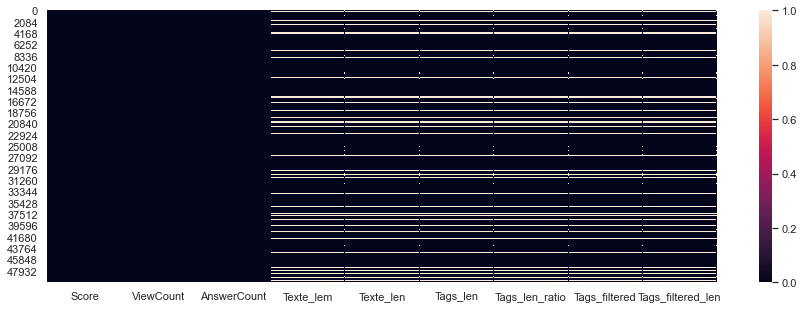

In [68]:
sns.heatmap(df.isna())

In [69]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Texte_lem,6112,0.12224
Texte_len,6112,0.12224
Tags_len,6112,0.12224
Tags_len_ratio,6112,0.12224
Tags_filtered,6112,0.12224
Tags_filtered_len,6112,0.12224
Score,0,0.00000
ViewCount,0,0.00000
AnswerCount,0,0.00000


## Distribution

In [70]:
df.describe(include = np.number)

,Score,ViewCount,AnswerCount,Texte_len,Tags_len,Tags_len_ratio,Tags_filtered_len
count,50000.000000,5.000000e+04,50000.000000,43888.000000,43888.000000,43888.000000,43888.000000
mean,32.586460,3.166381e+04,3.725420,1302.892636,51.163689,26.326513,1.738904
std,169.782703,1.328314e+05,3.996872,1582.585255,11.699424,32.885607,0.805583
min,6.000000,4.600000e+01,1.000000,49.000000,22.000000,1.000000,1.000000
25%,7.000000,3.167000e+03,2.000000,502.000000,43.000000,10.000000,1.000000
50%,10.000000,8.594000e+03,3.000000,858.000000,50.000000,17.000000,2.000000
75%,19.000000,2.273600e+04,4.000000,1508.000000,58.000000,30.000000,2.000000
max,9222.000000,9.880691e+06,93.000000,29649.000000,120.000000,723.000000,5.000000


In [74]:
cols = ['Score', 'ViewCount', 'AnswerCount', 'Texte_len','Tags_len','Tags_filtered_len']

In [75]:
from scipy.stats import norm
import scipy.stats as st

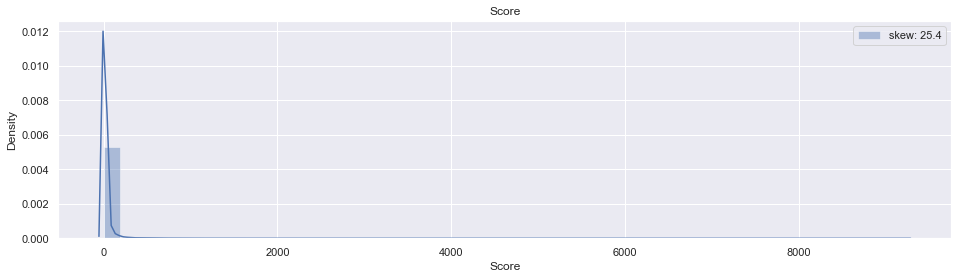

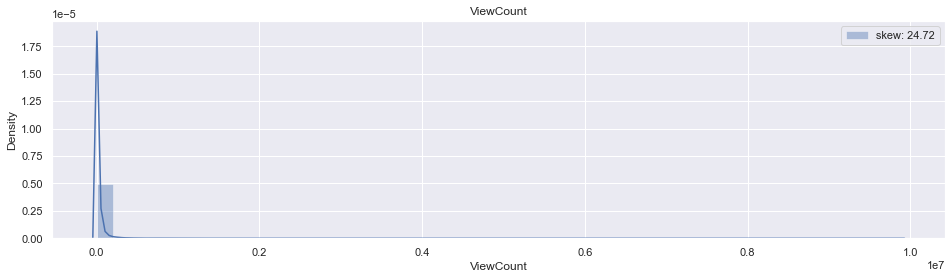

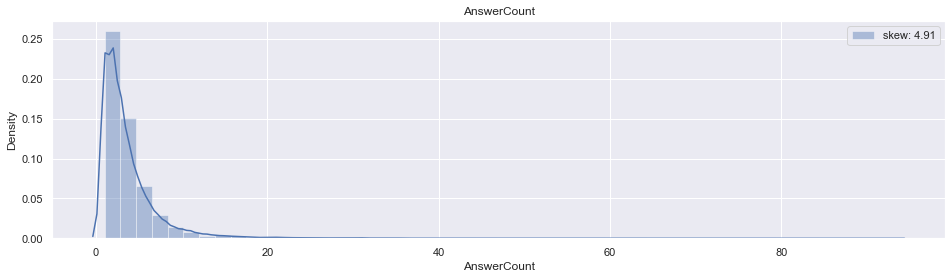

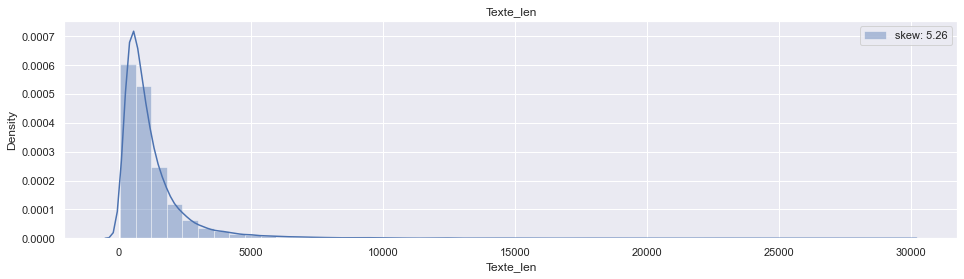

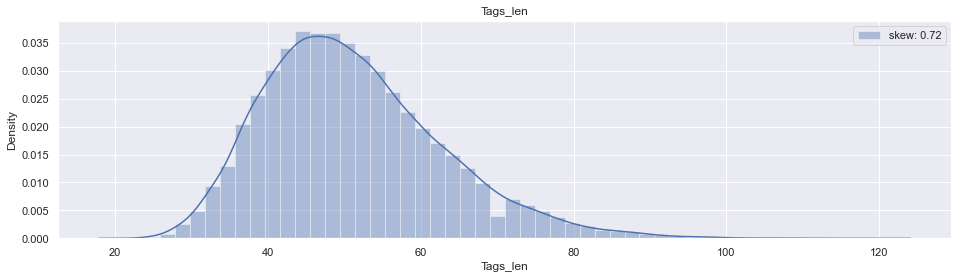

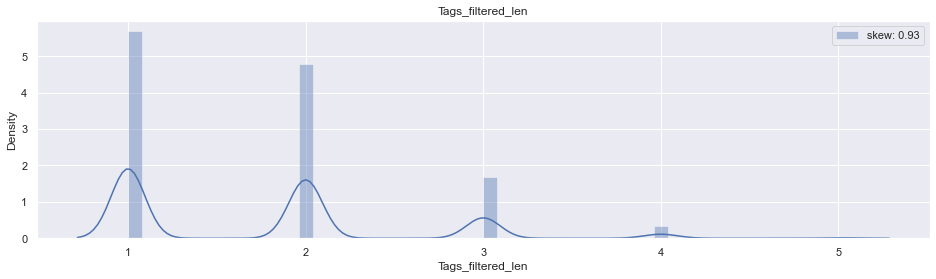

In [76]:
# réprésentation avec un displot 
for col in cols:
    plt.figure(figsize=(16, 4))
    sns.distplot(df[col], label="skew: "+str(np.round(df[col].skew(),2)))
    plt.title(col)
    plt.legend()

In [77]:
for col in cols:
        w, pvalue = st.shapiro(df[col])
        seuil = 0.05
        print(f'{col :-<50} {w} {pvalue}')
        if pvalue > seuil:
            print(
                "On ne peux pas rejetter H0: la distribution suit une loi normale")
        else:
            print(
                "On rejette H0 : la distribution ne suit pas une loi normale")

Score--------------------------------------------- 0.1031191349029541 0.0
On rejette H0 : la distribution ne suit pas une loi normale
ViewCount----------------------------------------- 0.1669636368751526 0.0
On rejette H0 : la distribution ne suit pas une loi normale
AnswerCount--------------------------------------- 0.600975751876831 0.0
On rejette H0 : la distribution ne suit pas une loi normale
Texte_len----------------------------------------- nan 1.0
On ne peux pas rejetter H0: la distribution suit une loi normale
Tags_len------------------------------------------ nan 1.0
On ne peux pas rejetter H0: la distribution suit une loi normale
Tags_filtered_len--------------------------------- nan 1.0
On ne peux pas rejetter H0: la distribution suit une loi normale


## Feature Scaling
Application d'une transformation logarithmique sur nos données numériques

In [78]:
df_transform = df.copy()

In [79]:
cols_to_scale = ['Score', 'ViewCount', 'AnswerCount', 'Texte_len','Tags_len','Tags_filtered_len']

In [80]:
# apply log(x+1) element-wise to a subset of columns
df_transform = df_transform[cols_to_scale].applymap(lambda x: np.log(x+1))

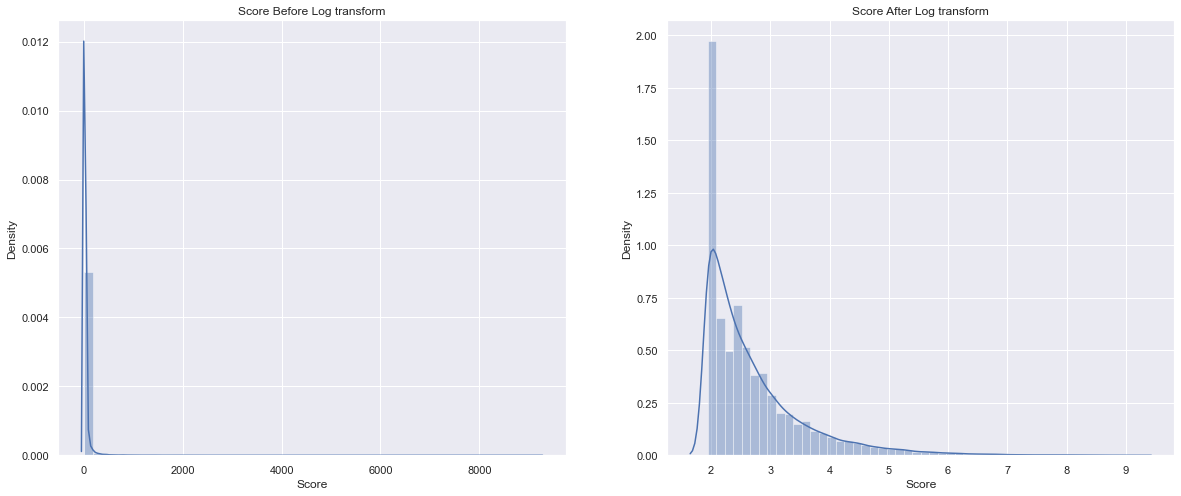

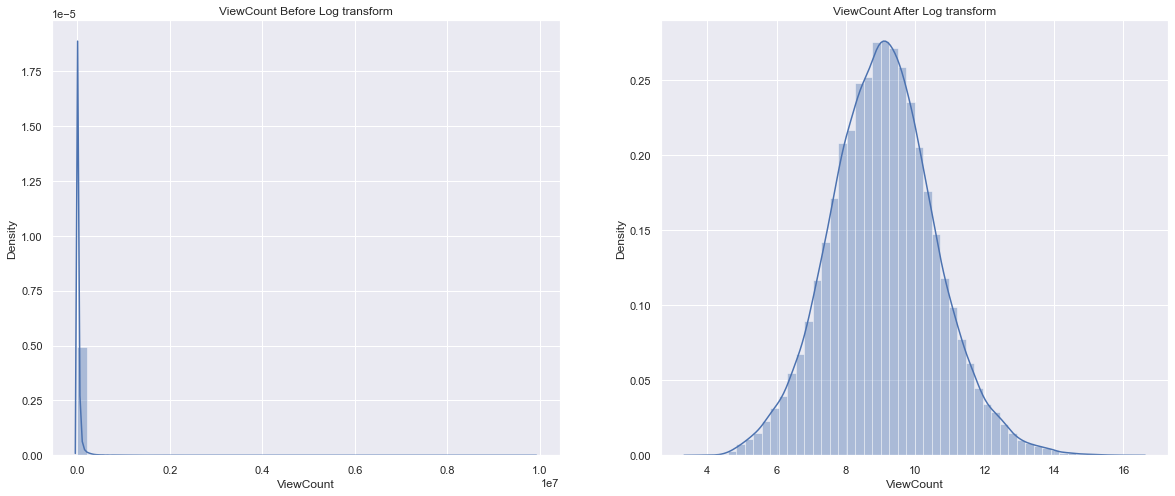

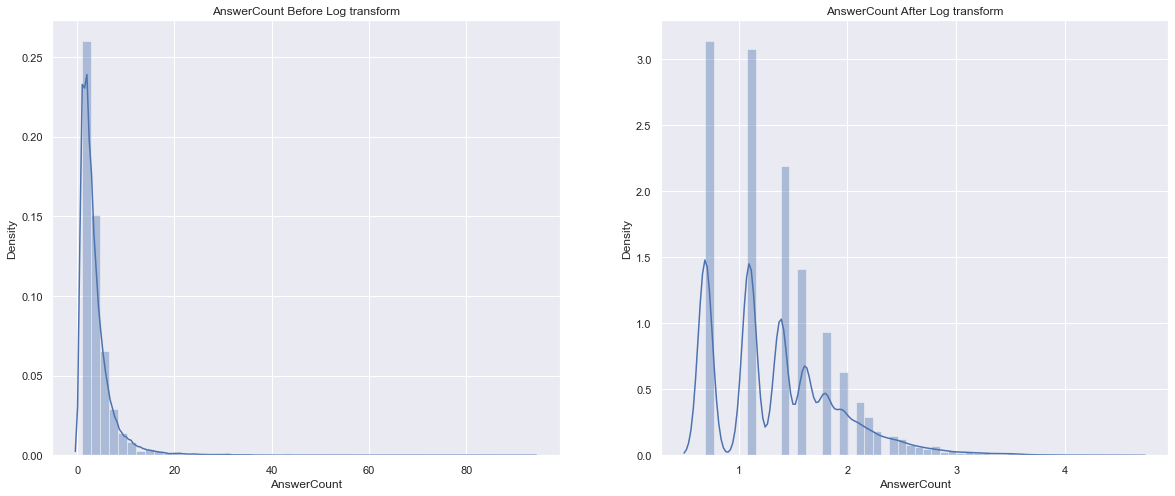

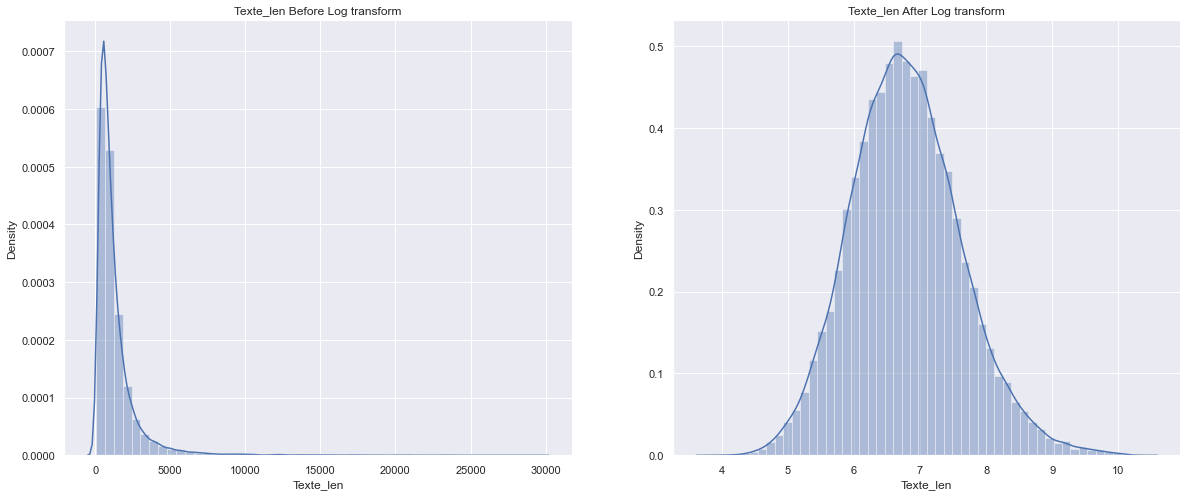

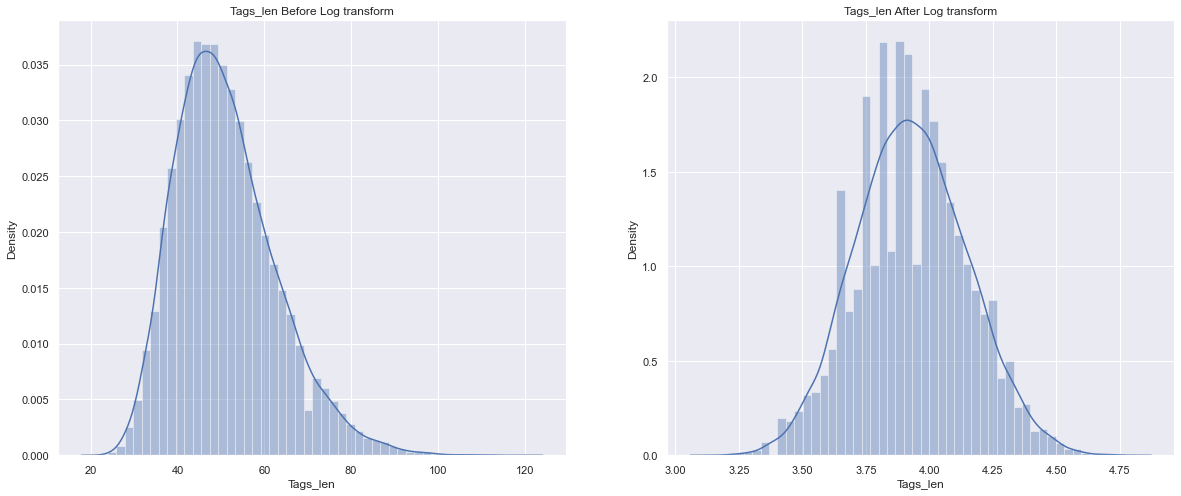

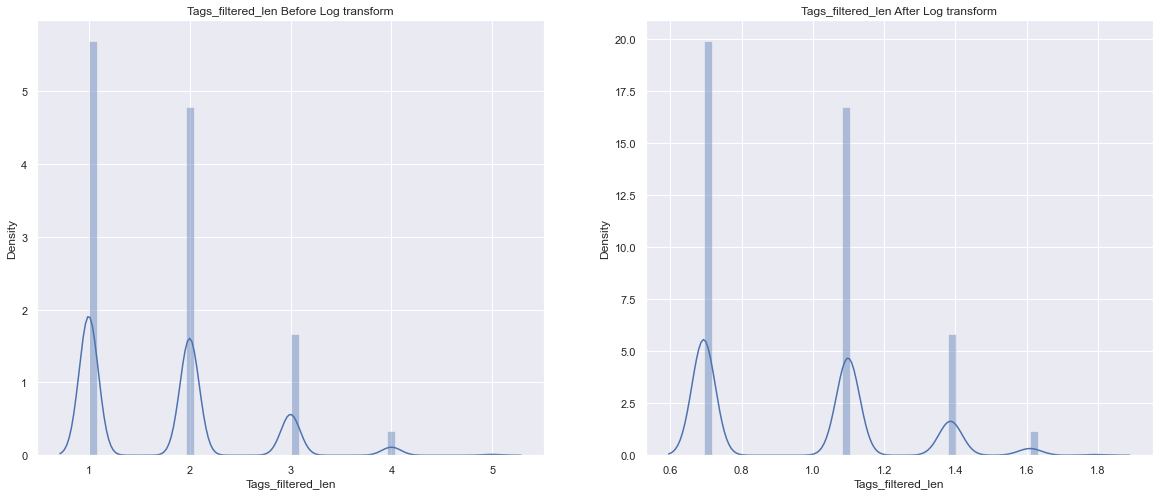

In [81]:
# Visualisation avant / Après log transform
for col1, col2 in zip(cols,cols_to_scale):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    sns.distplot(df[col1], ax=axes[0], label="skew: "+str(np.round(df[col1].skew(),2)))
    axes[0].set_title(f'{col1} Before Log transform')
    sns.distplot(df_transform[col2], ax=axes[1], label="skew: "+str(np.round(df_transform[col2].skew(),2)))
    axes[1].set_title(f'{col2} After Log transform')
    plt.show()

# Analyse multivariée

## Analyse des corrélations

In [84]:
# Compute correlation coefficients
corr_matrix = df.corr()

In [85]:
# Print the correlation matrix
corr_matrix

,Score,ViewCount,AnswerCount,Texte_len,Tags_len,Tags_len_ratio,Tags_filtered_len
Score,1.000000,0.760258,0.496536,-0.050906,-0.001533,-0.049810,-0.004169
ViewCount,0.760258,1.000000,0.519122,-0.056654,-0.025863,-0.052664,0.001892
AnswerCount,0.496536,0.519122,1.000000,-0.087024,-0.031048,-0.083063,0.050474
Texte_len,-0.050906,-0.056654,-0.087024,1.000000,0.064995,0.959338,-0.016518
Tags_len,-0.001533,-0.025863,-0.031048,0.064995,1.000000,-0.114695,-0.227618
Tags_len_ratio,-0.049810,-0.052664,-0.083063,0.959338,-0.114695,1.000000,0.021933
Tags_filtered_len,-0.004169,0.001892,0.050474,-0.016518,-0.227618,0.021933,1.000000


<AxesSubplot:>

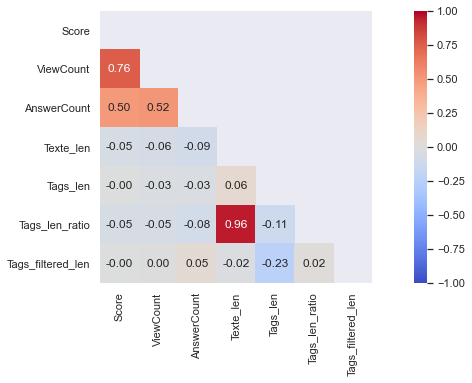

In [86]:
# Visualize the correlation matrix as a heatmap
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, cmap='coolwarm',
            annot=True, fmt=".2f", square=True)

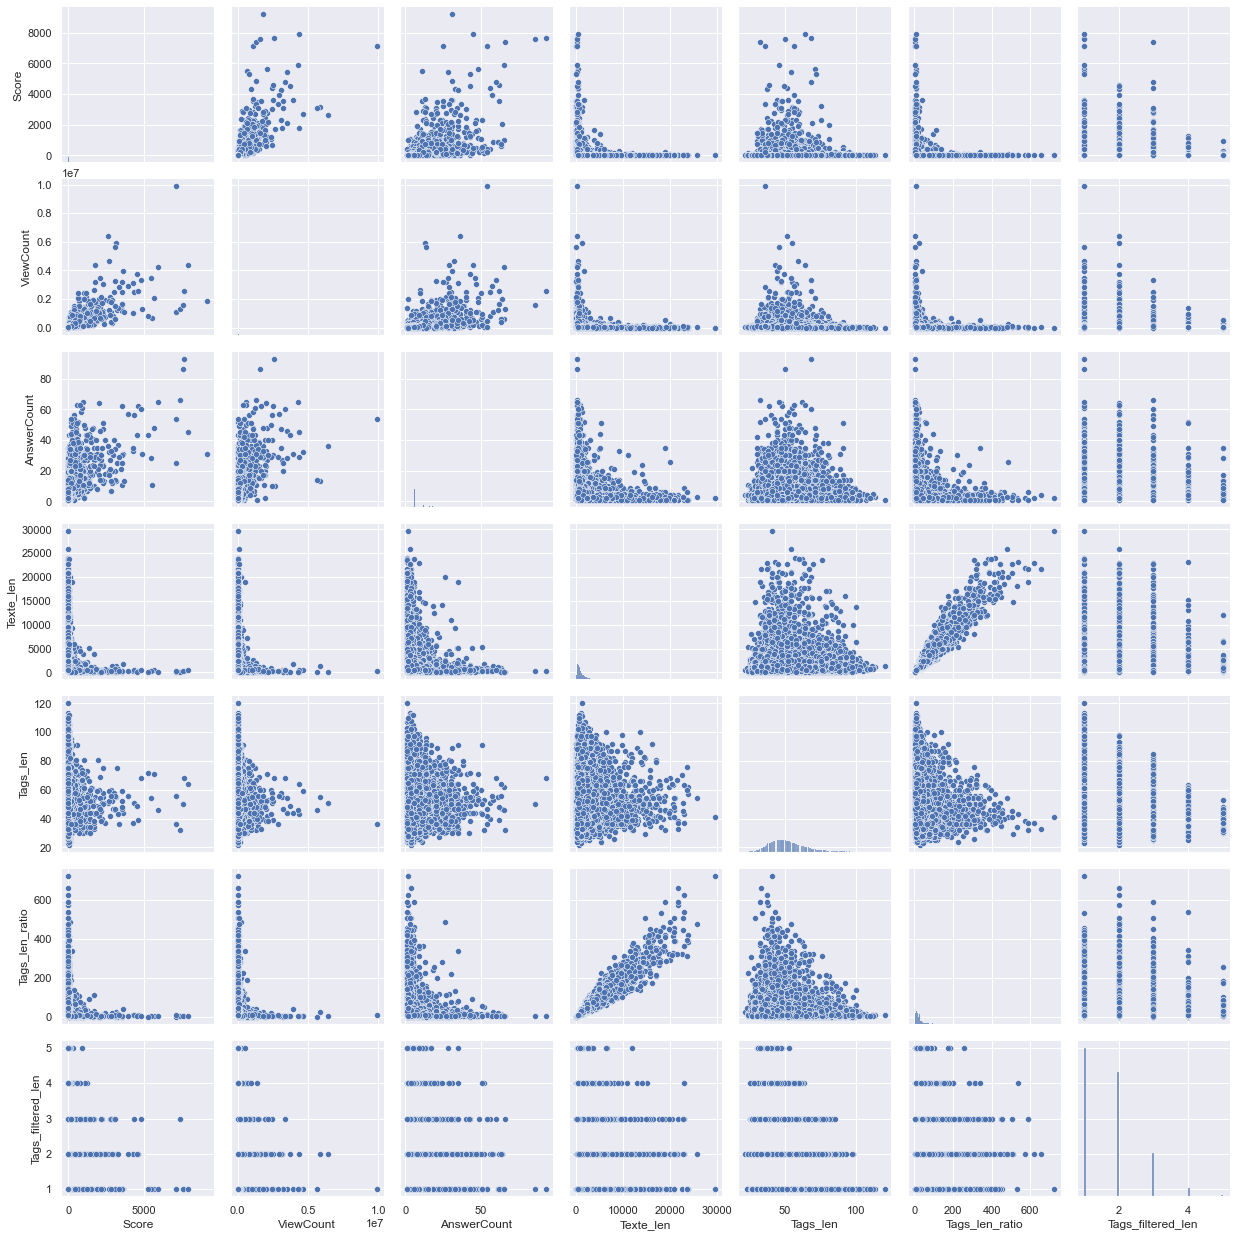

In [87]:
# pairplot
sns.pairplot(df)

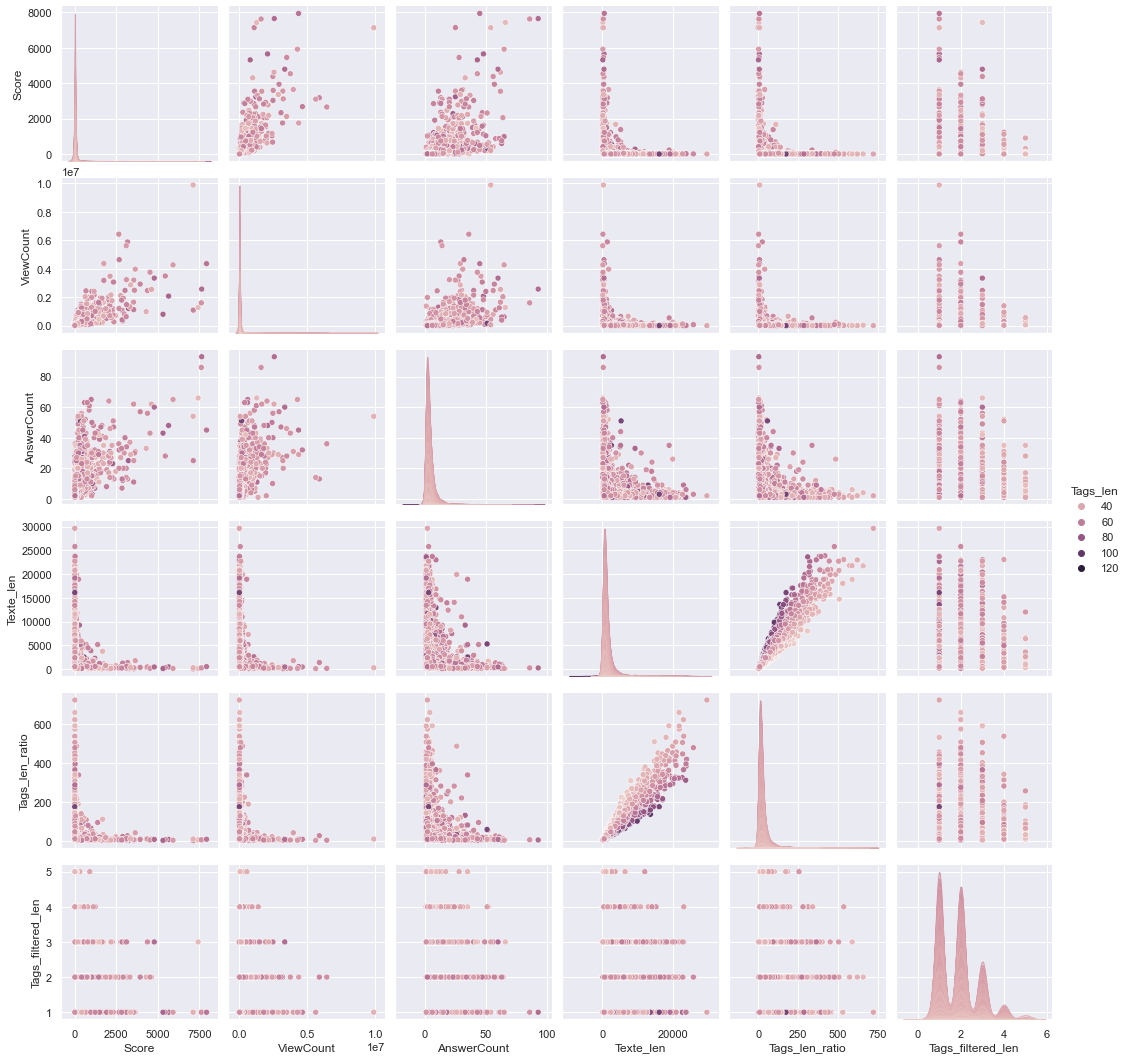

In [88]:
# pairplot with tags len
sns.pairplot(df, hue='Tags_len')

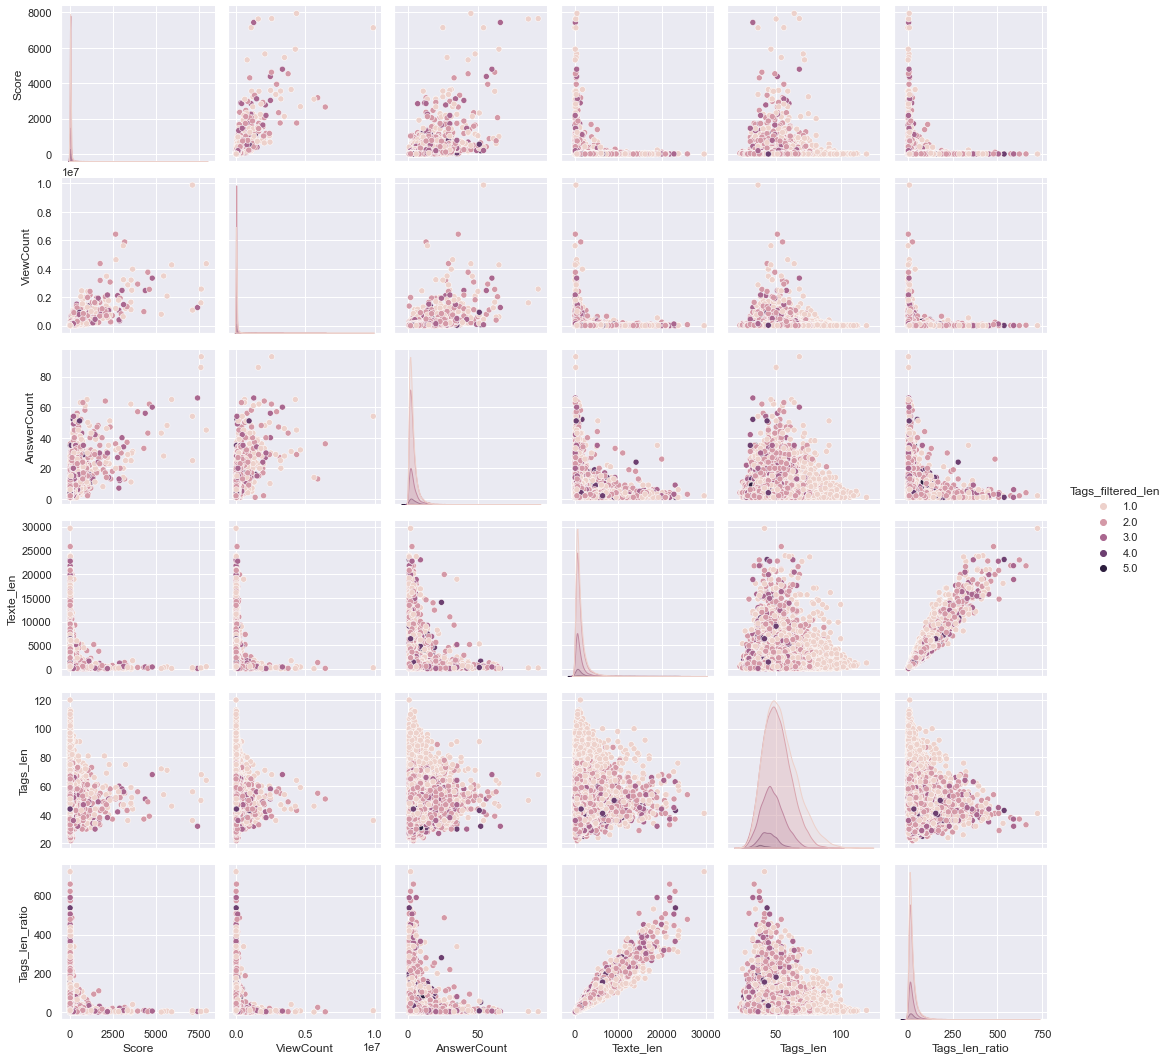

In [89]:
# pairplot with hue tag len filtrered
sns.pairplot(df, hue='Tags_filtered_len')

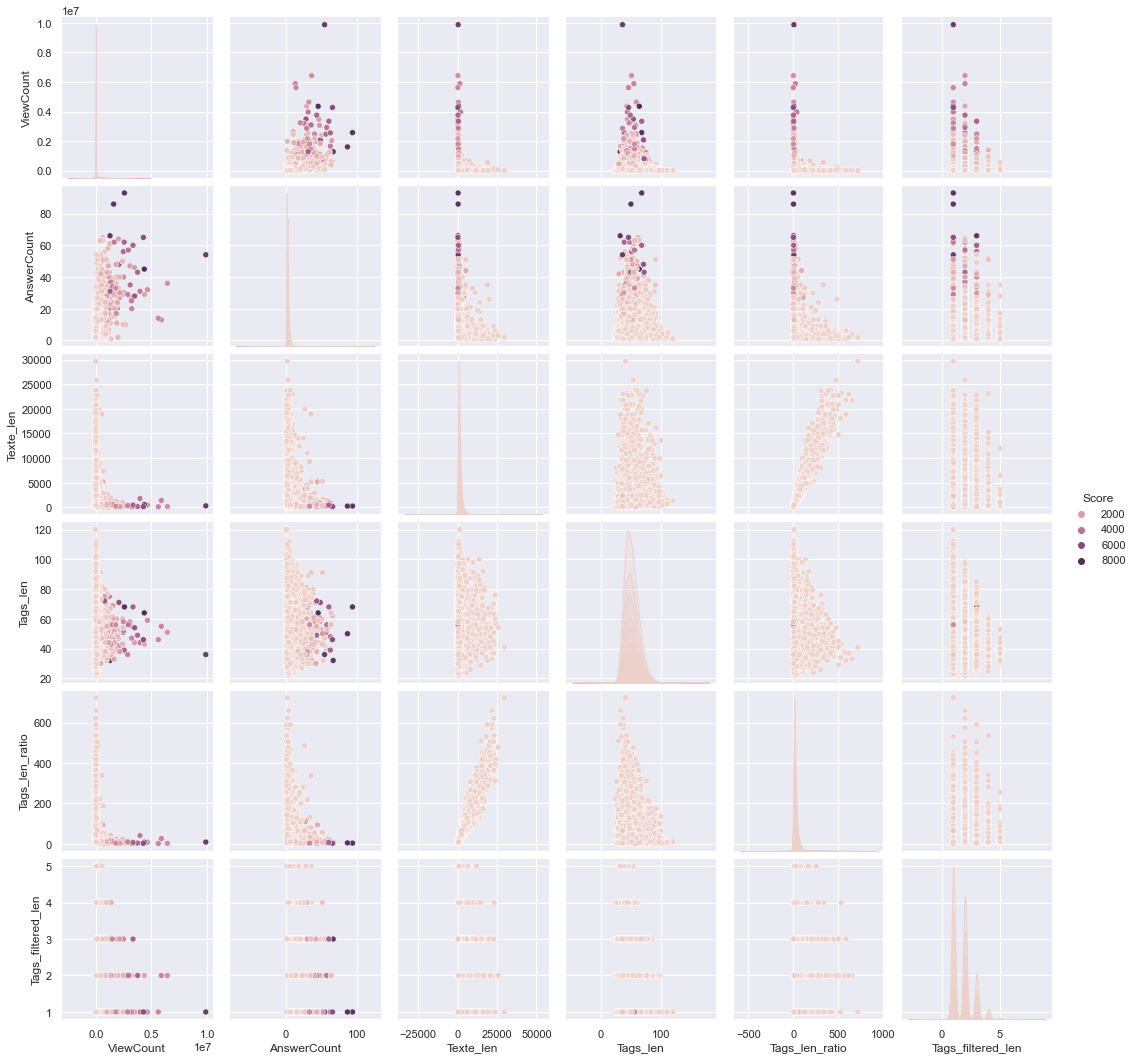

In [90]:
# pairplot with hue score
sns.pairplot(df, hue='Score')

# Conclusion exploration

In [ ]:
data.drop(['FavoriteCount', 'Title', 'Body', 'Tags', 
           'Body_clean', 'Title_clean',
           'Texte_clean', 'Tags_filtered_len',
           'Texte_len', 'Tags_len', 'Tags_len_ratio'], axis=1, inplace=True)

In [ ]:
data.to_csv('QueryResults_explored.csv', index=False, header=True)